In [1]:
import pandas as pd

In [22]:
df_lin1 = pd.read_csv('bert_linear/test_result.csv')
df_lin2 = pd.read_csv('bert_linear/test_result_db2.csv')
df_gru1 = pd.read_csv('bert_gru/test_result.csv')
df_gru2 = pd.read_csv('bert_gru/test_result_db2.csv')

In [23]:
for df in [df_lin1, df_lin2]:
    df.rename(columns={'label':'linear_lbl'}, inplace=True)
for df in [df_gru1,df_gru2]:
    df.rename(columns={'label':'gru_lbl'}, inplace=True)

In [25]:
df1 = pd.concat([df_lin1,df_gru1.gru_lbl], axis = 1)[['text','id','linear_lbl','gru_lbl']]
df1

,text,id,linear_lbl,gru_lbl
0,"['[CLS]', '没', '玩', '过', '啊', '[SEP]', '[PAD]'...",0,0,0
1,"['[CLS]', '停', '车', '减', '速', '[SEP]', '[PAD]'...",0,0,0
2,"['[CLS]', '看', '不', '出', '来', '？', '[SEP]', '[...",0,0,0
3,"['[CLS]', '屁', '民', '也', '是', '民', '[SEP]', '[...",2,0,2
4,"['[CLS]', '加', '油', '吧', '[SEP]', '[PAD]', '[P...",1,0,1
...,...,...,...,...
6530,"['[CLS]', '专', '赢', '阿', '森', '纳', '[SEP]', '[...",0,0,0
6531,"['[CLS]', '你', '先', '说', '吧', '[SEP]', '[PAD]'...",0,0,0
6532,"['[CLS]', '老', '哥', '吻', '乳', '沟', '[SEP]', '[...",0,0,0
6533,"['[CLS]', '汽', '车', '吧', '[SEP]', '[PAD]', '[P...",0,0,0


In [28]:
df1[df1.linear_lbl != df1.gru_lbl]

,text,id,linear_lbl,gru_lbl
3,"['[CLS]', '屁', '民', '也', '是', '民', '[SEP]', '[...",2,0,2
4,"['[CLS]', '加', '油', '吧', '[SEP]', '[PAD]', '[P...",1,0,1
22,"['[CLS]', '刘', '军', '不', '服', '[SEP]', '[PAD]'...",0,0,2
23,"['[CLS]', '打', '屎', '棍', '[SEP]', '[PAD]', '[P...",2,2,0
32,"['[CLS]', '舔', '屎', '[SEP]', '[PAD]', '[PAD]',...",2,0,2
...,...,...,...,...
6502,"['[CLS]', '放', '弃', '吧', '[SEP]', '[PAD]', '[P...",2,0,2
6506,"['[CLS]', '讲', '详', '细', '点', '[SEP]', '[PAD]'...",1,0,1
6516,"['[CLS]', '666', '，', '[SEP]', '[PAD]', '[PAD]...",0,0,1
6526,"['[CLS]', '就', '是', '太', '贵', '[SEP]', '[PAD]'...",2,0,2


In [42]:
df1_0 = df1[df1.id==0][df1.linear_lbl != df1.gru_lbl]
df1_1 = df1[df1.id==1][df1.linear_lbl != df1.gru_lbl]
df1_2 = df1[df1.id==2][df1.linear_lbl != df1.gru_lbl]

C:\Users\alienware\AppData\Local\Temp\ipykernel_16664\1300590116.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1_0 = df1[df1.id==0][df1.linear_lbl != df1.gru_lbl]
C:\Users\alienware\AppData\Local\Temp\ipykernel_16664\1300590116.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1_1 = df1[df1.id==1][df1.linear_lbl != df1.gru_lbl]
C:\Users\alienware\AppData\Local\Temp\ipykernel_16664\1300590116.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1_2 = df1[df1.id==2][df1.linear_lbl != df1.gru_lbl]


<AxesSubplot:>

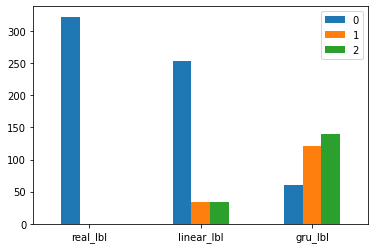

In [74]:
df_temp0 = pd.Series([len(df1_0),0,0], name='real_lbl')
df_diff_0 = pd.DataFrame([df_temp0, df1_0.linear_lbl.value_counts(), df1_0.gru_lbl.value_counts()])
df_diff_0.plot.bar(rot=0)

<AxesSubplot:>

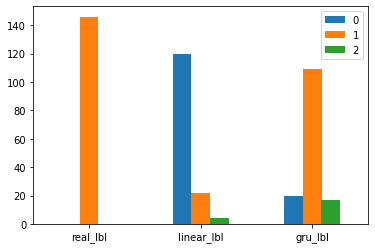

In [75]:
df_temp1 = pd.Series([0,len(df1_1),0], name='real_lbl')
df_diff_1 = pd.DataFrame([df_temp1, df1_1.linear_lbl.value_counts(), df1_1.gru_lbl.value_counts()])
df_diff_1.plot.bar(rot=0)

<AxesSubplot:>

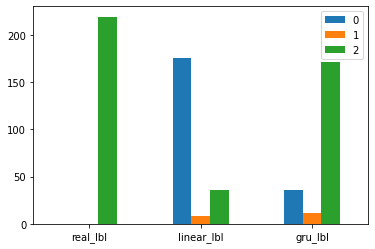

In [76]:
df_temp2 = pd.Series([0,0,len(df1_2)], name='real_lbl')
df_diff_2 = pd.DataFrame([df_temp2, df1_2.linear_lbl.value_counts(), df1_2.gru_lbl.value_counts()])
df_diff_2.plot.bar(rot=0)

<AxesSubplot:>

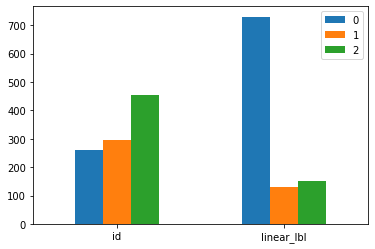

In [72]:
pd.DataFrame([df1[df1.id!=df1.linear_lbl].id.value_counts(), 
             df1[df1.id!=df1.linear_lbl].linear_lbl.value_counts()]).sort_index(axis = 1,ascending=True).plot.bar(rot=0)

<AxesSubplot:>

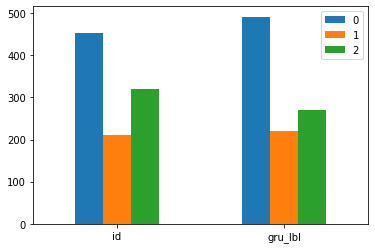

In [73]:
pd.DataFrame([df1[df1.id!=df1.gru_lbl].id.value_counts(), 
             df1[df1.id!=df1.gru_lbl].gru_lbl.value_counts()]).sort_index(axis = 1,ascending=True).plot.bar(rot=0)

In [77]:
df2 = pd.concat([df_lin2,df_gru2.gru_lbl], axis = 1)[['text','id','linear_lbl','gru_lbl']]
df2

,text,id,linear_lbl,gru_lbl
0,"['[CLS]', '很', '惊', '叹', '不', '用', '谢', '谢', '...",1,1,1
1,"['[CLS]', '你', '好', '我', '购', '票', '失', '败', '...",2,2,2
2,"['[CLS]', '好', '多', '次', '这', '样', '了', '[SEP]...",0,0,2
3,"['[CLS]', '我', '申', '请', '了', '大', '同', '飞', '...",2,0,0
4,"['[CLS]', '这', '个', '有', '效', '的', '吧', '[SEP]...",1,1,1
...,...,...,...,...
15995,"['[CLS]', '除', '了', '用', '身', '份', '证', '还', '...",0,0,0
15996,"['[CLS]', '我', '到', '了', '亲', '爱', '的', '第', '...",1,1,1
15997,"['[CLS]', '山', '家', '庭', '宽', '带', '20', '##m'...",0,0,0
15998,"['[CLS]', '送', '票', '最', '起', '码', '应', '该', '...",0,0,0


In [78]:
df2_0 = df2[df2.id==0][df2.linear_lbl != df2.gru_lbl]
df2_1 = df2[df2.id==1][df2.linear_lbl != df2.gru_lbl]
df2_2 = df2[df2.id==2][df2.linear_lbl != df2.gru_lbl]

C:\Users\alienware\AppData\Local\Temp\ipykernel_16664\3015153221.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_0 = df2[df2.id==0][df2.linear_lbl != df2.gru_lbl]
C:\Users\alienware\AppData\Local\Temp\ipykernel_16664\3015153221.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_1 = df2[df2.id==1][df2.linear_lbl != df2.gru_lbl]
C:\Users\alienware\AppData\Local\Temp\ipykernel_16664\3015153221.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2_2 = df2[df2.id==2][df2.linear_lbl != df2.gru_lbl]


<AxesSubplot:>

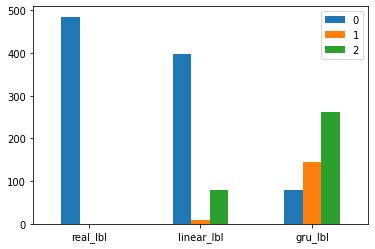

In [79]:
df_temp20 = pd.Series([len(df2_0),0,0], name='real_lbl')
df_diff_20 = pd.DataFrame([df_temp20, df2_0.linear_lbl.value_counts(), df2_0.gru_lbl.value_counts()])
df_diff_20.plot.bar(rot=0)

<AxesSubplot:>

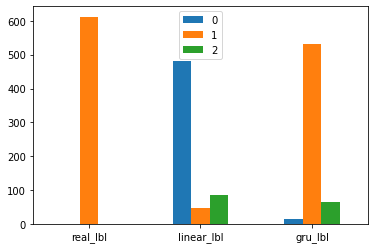

In [81]:
df_temp21 = pd.Series([0,len(df2_1),0], name='real_lbl')
df_diff_21 = pd.DataFrame([df_temp21, df2_1.linear_lbl.value_counts(), df2_1.gru_lbl.value_counts()])
df_diff_21.plot.bar(rot=0)

<AxesSubplot:>

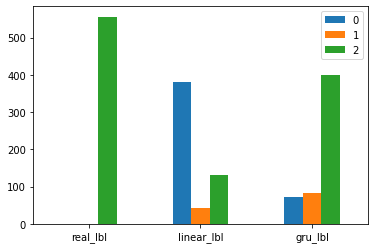

In [82]:
df_temp22 = pd.Series([0,0,len(df2_2)], name='real_lbl')
df_diff_22 = pd.DataFrame([df_temp22, df2_2.linear_lbl.value_counts(), df2_2.gru_lbl.value_counts()])
df_diff_22.plot.bar(rot=0)

<AxesSubplot:>

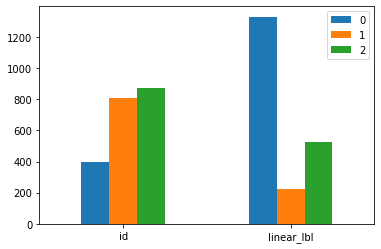

In [83]:
pd.DataFrame([df2[df2.id!=df2.linear_lbl].id.value_counts(), 
             df2[df2.id!=df2.linear_lbl].linear_lbl.value_counts()]).sort_index(axis = 1,ascending=True).plot.bar(rot=0)

<AxesSubplot:>

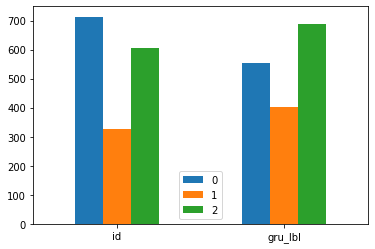

In [84]:
pd.DataFrame([df2[df2.id!=df2.gru_lbl].id.value_counts(), 
             df2[df2.id!=df2.gru_lbl].gru_lbl.value_counts()]).sort_index(axis = 1,ascending=True).plot.bar(rot=0)

In [87]:
print(len(df2), len(df2[df2.id!=df2.linear_lbl]), len(df2[df2.id!=df2.gru_lbl]))

16000 2079 1642
